In [1]:
import six

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_venn
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='paper')

%matplotlib inline
import flotilla

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'
study = flotilla.embark('singlecell_pnm_figure1_post_kmeans_outliers', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-05-13 10:39:25	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_post_kmeans_outliers/datapackage.json
2016-05-13 10:39:25	Parsing datapackage to create a Study object
2016-05-13 10:39:58	Initializing Study
2016-05-13 10:39:58	Initializing Predictor configuration manager for Study
2016-05-13 10:39:58	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-13 10:39:58	Added ExtraTreesClassifier to default predictors
2016-05-13 10:39:58	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-13 10:39:58	Added ExtraTreesRegressor to default predictors
2016-05-13 10:39:58	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-13 10:39:58	Added GradientBoostingClassifier to default predictors
2016-05-13 10:39:58	Predictor GradientBoostingRegressor is of type <class 'sklearn

In [2]:
study.splicing.minimum_samples

10

In [3]:
mkdir $folder

mkdir: cannot create directory `figures': File exists


## Expression Quality Control
### Number of detected genes

detected_genes.mean() 8.02368224299
detected_genes.groupby(study.sample_id_to_phenotype).mean() phenotype
MN      7.667781
NPC     7.594408
iPSC    8.925308
dtype: float64


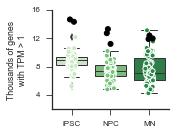

In [4]:
sns.set(context='paper', style='ticks')

detected_genes = (study.expression.data_original > 1).sum(axis=1)
detected_genes = detected_genes/1000

six.print_('detected_genes.mean()', detected_genes.mean())
six.print_('detected_genes.groupby(study.sample_id_to_phenotype).mean()', 
           detected_genes.groupby(study.sample_id_to_phenotype).mean())

detected_genes = detected_genes.to_frame().join(study.metadata.data[['pooled', 'phenotype']])
detected_genes = detected_genes.rename(columns={0: 'n_genes_detected'})

detected_genes_pooled = detected_genes.ix[detected_genes.pooled]
detected_genes_single = detected_genes.ix[~detected_genes.pooled]

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.boxplot(x='phenotype', y='n_genes_detected', order=study.phenotype_order, linewidth=1,
               data=detected_genes_single, palette=study.phenotype_color_ordered)
sns.stripplot(x='phenotype', y='n_genes_detected', order=study.phenotype_order, #size=2, 
              linewidth=1, edgecolor='white',
               data=detected_genes_single, palette=study.phenotype_color_ordered, jitter=True)
sns.stripplot(x='phenotype', y='n_genes_detected', order=study.phenotype_order,linewidth=1,
              data=detected_genes_pooled, color='k', size=5, jitter=True)
sns.despine()
ax.set_xlabel('')

ax.set_ylabel('Thousands of genes\nwith TPM > 1')

# Reduce number of ticks
yloc = plt.MaxNLocator(5)
ax.yaxis.set_major_locator(yloc)

sns.despine()
fig.tight_layout()
fig.savefig('{}/detected_genes.pdf'.format(folder))

### Mapped reads

In [5]:
study.mapping_stats.data.head()

,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Number of input reads,Average input read length,UNIQUE READS,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,...,% of reads mapped to too many loci,UNMAPPED READS,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,% splices: Annotated (sjdb),% splices: GT/AG,% splices: GC/AG,% splices: AT/AC,% splices: Non-canonical
CVN_01,Feb 21 15:54:22,Feb 21 15:55:44,Feb 21 15:57:19,459.82,12134131,99,NaN,11128688,91.71,98.27,...,0.03,NaN,0,3.10,0.02,98.841858,99.126387,0.652647,0.134704,0.086261
CVN_02,Feb 21 15:55:43,Feb 21 15:57:11,Feb 21 15:58:51,480.66,13351539,99,NaN,12219037,91.52,98.13,...,0.04,NaN,0,3.96,0.02,98.614629,99.020137,0.801086,0.097722,0.081054
CVN_03,Feb 21 16:51:58,Feb 21 16:53:51,Feb 21 16:55:31,484.15,13448587,99,NaN,12210025,90.79,98.07,...,0.03,NaN,0,4.99,0.02,98.596403,99.028733,0.796140,0.101854,0.073272
CVN_04,Feb 21 16:45:53,Feb 21 16:47:23,Feb 21 16:48:59,474.71,12658833,99,NaN,11805790,93.26,98.33,...,0.04,NaN,0,2.89,0.02,98.831275,99.120483,0.711286,0.084708,0.083523
CVN_05,Feb 21 16:50:26,Feb 21 16:52:19,Feb 21 16:54:01,486.68,13789345,99,NaN,12894337,93.51,98.44,...,0.03,NaN,0,2.49,0.02,98.605923,99.083942,0.761804,0.089186,0.065069


n_genes_detected    8.023682
pooled              0.037383
dtype: float64
           n_genes_detected    pooled
phenotype                            
MN                 7.667781  0.041096
NPC                7.594408  0.039474
iPSC               8.925308  0.030769


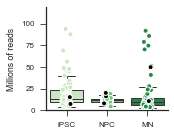

In [6]:
# sns.set(context='paper', style='ticks')
reads_col = 'Uniquely mapped reads number'
mapped_reads = study.mapping_stats.data[reads_col]/1e6

print detected_genes.mean()
print detected_genes.groupby(study.sample_id_to_phenotype).mean()

mapped_reads = mapped_reads.to_frame().join(study.metadata.data[['pooled', 'phenotype']])
mapped_reads = mapped_reads.rename(columns={0: 'Millions of reads'})

mapped_reads_pooled = mapped_reads.ix[mapped_reads.pooled]
mapped_reads_single = mapped_reads.ix[~mapped_reads.pooled]

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.boxplot(x='phenotype', y=reads_col, order=study.phenotype_order, linewidth=1, 
               data=mapped_reads_single, palette=study.phenotype_color_ordered, fliersize=0)
sns.stripplot(x='phenotype', y=reads_col, order=study.phenotype_order, linewidth=1,edgecolor='white', #size=2,
               data=mapped_reads_single, palette=study.phenotype_color_ordered, jitter=True)
sns.stripplot(x='phenotype', y=reads_col, order=study.phenotype_order, linewidth=1,edgecolor='white',
              data=mapped_reads_pooled, color='k', size=5, jitter=True)
sns.despine()
ax.set_xlabel('')

ax.set_ylabel('Millions of reads')

ymin, ymax = ax.get_ylim()
ax.set_ylim(0, ymax)

# Reduce number of ticks
yloc = plt.MaxNLocator(5)
ax.yaxis.set_major_locator(yloc)

sns.despine()
fig.tight_layout()
fig.savefig('{}/mapped_reads.pdf'.format(folder))

### Number of detected genes, per transcript type

### Differentially expressed genes between outliers and non-outliers

Focus on just NPC and MN because that's where the majority of the outliers are.

In [ ]:
expression = study.expression.singles.ix[study.metadata.data.phenotype.map(lambda x: x in ('MN', 'NPC'))].dropna()
print expression.shape
# Use only genes which have $\log_2(TPM+1) > 1$ in at least 3 cells.
expression = expression.ix[:, (expression > 1).sum() >= 3]
expression.groupby(study.sample_id_to_phenotype).size()

(143, 18594)


phenotype
MN     70
NPC    73
dtype: int64

In [ ]:
from scipy.stats import kruskal

grouped = expression.groupby(study.sample_id_to_phenotype)

def outliers_diff_expression(df1):
    # Use only genes which have $\log_2(TPM+1) > 1$ in at least 3 cells.
    df1 = df1.ix[:, (df1 > 1).sum() >= 3].dropna()
    return df1.groupby(level=0, axis=1).apply(lambda df2: pd.Series(kruskal(*[x for name, x in 
                                                                              df2.groupby(study.metadata.data.outlier)]), 
                                                                    index=['H_statistic', 'p_value']))

kruskal_results = grouped.apply(outliers_diff_expression)
kruskal_results.head()

In [ ]:
kruskal_results_tidy = kruskal_results.T
kruskal_results_tidy.head()

In [ ]:
kruskal_results_tidy = kruskal_results_tidy.stack(level=0).reset_index()
kruskal_results_tidy = kruskal_results_tidy.rename(columns={'level_0': 'gene_id'})
kruskal_results_tidy.head()

In [ ]:
kruskal_results_tidy['bonferonni_p_value'] = kruskal_results_tidy.groupby(
    'phenotype', as_index=False, group_keys=False).apply(lambda x: x.p_value * x.shape[0])
kruskal_results_tidy.head()

In [ ]:
fig, ax = plt.subplots(figsize=(2, 2))

sns.distplot(kruskal_results_tidy.bonferonni_p_value, color='grey', ax=ax, kde=False)
sns.despine(offset=2)
ax.set(xlim=(0,10000))
ax.locator_params(nbins=3)
fig.tight_layout()
fig.savefig('{}/outlier_neural_types_differential_expression_p_distribution.pdf'.format(folder))

In [ ]:
p = 0.001
kruskal_results_tidy_significant = kruskal_results_tidy.ix[kruskal_results_tidy.bonferonni_p_value < p]
print kruskal_results_tidy_significant.gene_id.unique().shape
gene_ids = kruskal_results_tidy_significant.gene_id.unique()

In [ ]:
go = study.go_enrichment(gene_ids, background=expression.columns, p_value_cutoff=p, domain='biological_process', 
                         min_background_size=10, min_feature_size=5)
go = go.iloc[:10, :]
sns.set(style='ticks', context='paper')

fig, ax = plt.subplots(figsize=(4, 2))

y = np.arange(go.shape[0])
width = -np.log10(go.bonferonni_corrected_p_value)
ax.barh(y, width, color='grey')

yticks = y + 0.4
ax.set(yticklabels=go.go_name, yticks=yticks, xlabel='$\log_{10}p$-value', ylim=(0, y.max()+1))
sns.despine()
fig.tight_layout()
fig.savefig('{}/outlier_neural_types_go_enrichment.pdf'.format(folder))

#### Clustermap of DE genes

In [ ]:
# data = expression.T
# data = (data - data.mean())/data.std()
# data = data.ix[gene_ids, :]
data = expression.ix[:, gene_ids].T


# IN case this data is properly logged in the future...
if study.expression.data.max().max() > 100:
    data = np.log2(data+1)

col_colors = [study.sample_id_to_color[data.columns], 
              study.metadata.data.outlier[data.columns].map(lambda x: 'lightgrey' if x else 'k')]
yticklabels = study.expression.feature_data.gene_name[data.index]

g = sns.clustermap(data=data, col_colors=col_colors, yticklabels=yticklabels, method='ward', figsize=(8, 8),
                  cbar_kws=dict(label='$\log_2(TPM+1)'))
g.ax_heatmap.set(yticks=[], xticks=[])
g.ax_col_colors.set(xticks=[], yticks=[])
g.savefig('{}/outlier_neural_types_clustermap.pdf'.format(folder))

#### Colorbar legend

In [ ]:
# sns.set(style='ticks', context='talk')
fig, axes = plt.subplots(nrows=2, figsize=(1.5, 1))

phantom_bars = {'Celltype': {'NPC': study.phenotype_to_color['NPC'],
                             'MN': study.phenotype_to_color['MN']},
                '$k$-Means Outlier': {'Outlier': 'lightgrey', 'Not outlier': 'k'}}
legends = []
for (title, label_to_color), ax in zip(phantom_bars.items(), axes.flat):
    for label, color in label_to_color.items():
        ax.bar(0, 0, 0,  color=color, label=label)
    legends.append(ax.legend(loc='center', title=title, ncol=2))
    ax.axis('off')
fig.tight_layout()
fig.savefig('{}/outlier_neural_types_clustermap_color_labels.pdf'.format(folder), bbox_inches='tight', bbox_extra_artists=legends)


## Splicing quality control

In [ ]:
sns.set(style='ticks', context='paper')

grouped = study.splicing.data_original.groupby(study.metadata.data.pooled)
detected_events = grouped.apply(lambda x: x.groupby(study.sample_id_to_phenotype).apply(lambda y: y.count(axis=1)))
detected_events = detected_events/1000
detected_events = detected_events.reset_index()
detected_events = detected_events.rename(columns={0: 'n_events', 'level_1': 'phenotype', 'level_2': 'sample_id'})
detected_events.phenotype = pd.Categorical(detected_events.phenotype, categories=study.phenotype_order, ordered=True)
detected_events.head()

In [ ]:
detected_events_singles = detected_events.ix[~detected_events.pooled]
detected_events_pooled = detected_events.ix[detected_events.pooled]


fig, ax = plt.subplots(figsize=(2.5, 2))
sns.boxplot(x='phenotype', y='n_events', data=detected_events_singles, palette=study.phenotype_color_ordered, linewidth=1.5)
sns.stripplot(x='phenotype', y='n_events', data=detected_events_singles, edgecolor='gray',
              palette=study.phenotype_color_ordered, linewidth=1, #size=2, 
              jitter=True)
sns.stripplot(x='phenotype', y='n_events', data=detected_events_pooled, color='k', size=5, linewidth=1, jitter=True)
sns.despine()
ax.set_xlabel('')
ax.set_ylabel('AS events $\times 10^3$')
ymin, ymax = ax.get_ylim()
ax.set_ylim(0, ymax)
ax.locator_params('y', nbins=5)
fig.tight_layout()
fig.savefig("{}/A_splicing_events_detected.pdf".format(folder))

In [ ]:
import itertools

sns.set(style='whitegrid')

nrows = study.metadata.n_phenotypes

largest_group = study.sample_id_to_phenotype.groupby(study.sample_id_to_phenotype).size().max()

fig, axes = plt.subplots(nrows=nrows, figsize=(.5*largest_group, 6*study.metadata.n_phenotypes), sharey=True)
paired = sns.color_palette('Paired', n_colors=4)

splits = study.metadata.data.split.dropna()
split_to_pair = dict((x, tuple(sorted([x, y]))) for x, y in splits.iteritems())
unique_pairs = set([tuple(sorted([x, y])) for x, y in splits.iteritems()])
pair_colors = sns.color_palette('husl', n_colors=len(unique_pairs))
pair_to_colors = dict(zip(unique_pairs, pair_colors))


total_width = 0.8
# width = total_width/expression_binned.shape[1]


for ax, phenotype in zip(axes, study.metadata.phenotype_order):
    sample_ids = study.sample_id_to_phenotype.index[study.sample_id_to_phenotype == phenotype]
    pooled = sample_ids[study.metadata.data.pooled[sample_ids]]
    if phenotype == 'iPSC':
        split = list(itertools.chain(*unique_pairs))
    else:
        split = []
    singles = sample_ids.difference(pooled).difference(split)
    
    ordered_sample_ids = np.concatenate([pooled, split, singles])
    
    splicing = study.splicing.data_original.ix[ordered_sample_ids]
    n_events = splicing.T.count()
    print phenotype, 'n_events.mean(), n_events.std()', n_events.mean(), n_events.std()
    
    n_events = n_events.fillna(0)
    left = np.arange(n_events.shape[0])
    
    color = study.phenotype_to_color[phenotype]
    ax.bar(left, n_events, color=color, label='Number of splicing events detected' , width=total_width)
#     ax.set_ylim(1, n_events.max().max()*1.1)
    xticks = left+total_width/2
    ax.set_xticks(xticks)
    ax.set_xticklabels(ordered_sample_ids, rotation=90, visible=True, fontsize=24)
    ax.set_xlim(0, xticks.max()+0.5)
    
    for label in ax.get_xticklabels():
        text = label.get_text()
        if label.get_text() in study.pooled:
            label.set(backgroundcolor='lightgrey', weight='bold')
        elif text in splits:
            pair = split_to_pair[text]
            color = pair_to_colors[pair]
            label.set(backgroundcolor=color)
    ax.xaxis.grid(False)

    ax.set_title(phenotype, fontsize=32)
    ax.set_ylabel('Alternatively spliced junctions', fontsize=24)
    
#     ax.set_yticks(np.arange(0, n_events.max()+1000, 2500))
    ax.locator_params('y', nbins=5)
    for label in ax.get_yticklabels():
        label.set(size=24)
#     if ax.is_first_row():
#         ax.legend(loc="best", fontsize=24)
    
sns.despine()
fig.tight_layout()
fig.savefig('{}/quality_control_all_cells_splicing_barplots.pdf'.format(folder))

### Number of cells per event

In [ ]:
sns.set(style='ticks', context='talk')

for phenotype, df in study.splicing.data_original.groupby(study.sample_id_to_phenotype):    
    counts = df.count()
    fig, ax = plt.subplots(figsize=(3, 2))
    color = study.phenotype_to_color[phenotype]
    sns.distplot(counts, bins=np.arange(1, counts.max()+1), kde=False, color=color, 
                 hist_kws=dict(alpha=0.75, linewidth=0.1))

    # Reduce nubmer of ticks
    ymin, ymax = ax.get_ylim()
    ax.vlines(10, ymin, ymax, linestyle='--')
    
    ax.set(ylabel='AS events', xlabel="Single cells", title=phenotype)
    ax.locator_params(nbins=4)
    
    fig.tight_layout()
    sns.despine()
    fig.savefig('{}/n_cells_per_event_{}.pdf'.format(folder, phenotype))

    
## All events
phenotype = 'all'
counts = study.splicing.data_original.count()
fig, ax = plt.subplots(figsize=(3, 2))
color = '#262626'
sns.distplot(counts, bins=np.arange(1, counts.max()+1), kde=False, color=color, 
             hist_kws=dict(alpha=0.75, linewidth=0.1))
ymin, ymax = ax.get_ylim()
ax.set_title(phenotype)
ax.set_xlabel('Cells')
ax.set_ylabel('AS events')

# Reduce number of tick
ax.locator_params(nbins=4)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
x1 = [0, 0]
x2 = [10,10]
# x1 = 10,10]
# x2 = [xmax, xmax]

# ax.fill_betweenx([ymin, ymax], x1, x2, color='darkgrey', zorder=-1)
ax.vlines(10, ymin, ymax, linestyle='--')

fig.tight_layout()
sns.despine()
fig.savefig('{}/n_cells_per_event_{}.pdf'.format(folder, phenotype))


### Diversity of splice junction features
https://en.wikipedia.org/wiki/Diversity_index

#### True diversity

$^qD = \frac{1}{M_{q-1}} = \frac{1}{\sqrt[q-1]{\sum_{i=1}^{R} p_i p_i^{q-1}}} = \left(\sum_{i=1}^{R} p_i^q\right)^{1/(1-q)}$

* $M_{q-1}$: average proportional abundance of the types in the dataset
* $R$: richness
* $p_i$: Proportional abundance of the $i$th type

Pick different values of $q$...

With $q=1$, equation is undefined but limit approaches

$
^1D = \frac{1}{\prod_{i=1}^{R} p_i^{p_i}} = \exp\left(-\sum_{i=1}^{R}p_i \ln(p_i)\right)
$

In [ ]:
folder

In [ ]:
diversity_folder = '{}/diversity'.format(folder)
! mkdir $diversity_folder

In [ ]:
splicing_original = study.splicing.data_original.copy()
singles = splicing_original.loc[study.splicing.singles.index]
print singles.shape
singles.head()

In [ ]:
counts = splicing_original.groupby(study.sample_id_to_phenotype).count()
proportions = counts.divide(counts.sum(axis=1), axis='index')
proportions.head()

Implementation of:

$
^1D = \frac{1}{\prod_{i=1}^{R} p_i^{p_i}} = \exp\left(-\sum_{i=1}^{R}p_i \ln(p_i)\right)
$

In [ ]:
sns.set(style='ticks', context='talk')
diversity = np.exp(- proportions.multiply(np.log(proportions)).sum(axis=1))
diversity = diversity[study.phenotype_order]

fig, ax = plt.subplots(figsize=(3, 2))
left = np.arange(diversity.shape[0])
color = [study.phenotype_to_color[p] for p in diversity.index]
ax.bar(left, diversity, color=color, linewidth=1)

xticks = left + 0.4
ax.locator_params('y', nbins=4)
ax.set(xticks=xticks, xticklabels=diversity.index, ylabel='Shannon Diversity Index')
sns.despine()
fig.tight_layout()
fig.savefig('{}/shannon_diversity_index.pdf'.format(diversity_folder))

### Shannon diversity for Expression

In [ ]:
expression_singles = study.expression.singles
six.print_(expression_singles.shape)
not_outliers = study.expression.singles.index.difference(study.expression.outliers.index)
expression_singles = expression_singles.loc[not_outliers]
six.print_(expression_singles.shape)

In [ ]:
expression_sum = expression_singles.groupby(study.sample_id_to_phenotype).sum()
expression_proportions = expression_sum.divide(expression_sum.sum(axis=1), axis=0)
expression_proportions

In [ ]:
sns.set(style='ticks', context='talk')
expression_diversity = np.exp(- expression_proportions.multiply(np.log(expression_proportions)).sum(axis=1))
expression_diversity = expression_diversity[study.phenotype_order]

fig, ax = plt.subplots(figsize=(3, 2))
left = np.arange(expression_diversity.shape[0])
color = [study.phenotype_to_color[p] for p in diversity.index]
ax.bar(left, expression_diversity, color=color, linewidth=1)

xticks = left + 0.4
ax.locator_params('y', nbins=4)
ax.set(xticks=xticks, xticklabels=diversity.index, ylabel='Shannon Diversity Index')
sns.despine()
fig.tight_layout()
fig.savefig('{}/shannon_diversity_index_expression.pdf'.format(diversity_folder))

In [ ]:
expression_diversity_df = expression_diversity.reset_index()
expression_diversity_df = expression_diversity_df.rename(columns={0: 'Shannon Diversity'})
expression_diversity_df['data_type'] = 'Expression'
expression_diversity_df

In [ ]:
splicing_diversity_df = diversity.reset_index()
splicing_diversity_df = splicing_diversity_df.rename(columns={0: 'Shannon Diversity'})
splicing_diversity_df['data_type'] = 'Splicing'
splicing_diversity_df

In [ ]:
diversity_df = pd.concat([expression_diversity_df, splicing_diversity_df])
diversity_df

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2))
sns.barplot(x='data_type', y='Shannon Diversity', data=diversity_df, hue='phenotype', 
            palette=study.phenotype_color_ordered, hue_order=study.phenotype_order)
ax.set(xlabel='', ylabel='Shannon Diversity')
ax.locator_params(nbins=5, axis='y')
sns.despine()
fig.tight_layout()
fig.savefig('{}/shannon_diversity_expression_splicing.pdf'.format(diversity_folder))

### Inverse Simpson index

This is more intuitive because datasets with a larger number of species and fewer abundances per species will have larger diversity.

$1/\lambda = \frac{1}{\sum_{i=1}^R p_i^2} =\, ^2D$

In [ ]:
sns.set(style='ticks', context='talk')
diversity = 1/np.square(proportions).sum(axis=1)
diversity = diversity[study.phenotype_order]

fig, ax = plt.subplots(figsize=(3, 2))
left = np.arange(diversity.shape[0])
color = [study.phenotype_to_color[p] for p in diversity.index]
ax.bar(left, diversity, color=color, linewidth=1)

xticks = left + 0.4
ax.locator_params('y', nbins=4)
ax.set(xticks=xticks, xticklabels=diversity.index, ylabel='Inverse Simpson Index')
sns.despine()
fig.tight_layout()
fig.savefig('{}/inverse_simpson_index.pdf'.format(diversity_folder))

### Percentage of events detected in only one cell

In [ ]:
junction_counts = splicing_original.groupby(study.sample_id_to_phenotype).count().unstack()
junction_counts.head()

In [ ]:
junction_counts = junction_counts.reset_index()
junction_counts = junction_counts.rename(columns={'level_0': 'event_name', 0: 'n_cells'})
junction_counts.head()

In [ ]:
print junction_counts.shape
junction_counts = junction_counts.loc[junction_counts.n_cells > 0]
print junction_counts.shape

In [ ]:

   
def percent_junctions_at_quantiles(series, quantiles=[0, 0.25, 0.5, 1.]):
    """Get the percent of junctions observed in 25% of cells, 50% of cells, etc
    
    Note: 0% gets interpreted as how many junctions were observed in 1 cell, not 0 cells 
    (since 0 cells is boring)
    """
    series.index = series.index.droplevel(0)
    total = series.sum()
    percentage = 100*series/total
    
    percentage_at_quantiles = pd.Series(index=quantiles)
    for q in quantiles:
        if q == 0:
            percentage_at_quantiles.loc[0] = percentage[1]
        else:
            i = int(np.round(q * series.index.max()))
#             print q, i, series[:i]/total
            percentage_at_quantiles.loc[q] = percentage[i]
    return percentage_at_quantiles

In [ ]:
junctions_per_cell = junction_counts.groupby(['phenotype', 'n_cells']).size()
percent_junctions_per_cell = junctions_per_cell/junctions_per_cell.groupby(level=0).sum()
# percent_junctions_per_cell = percent_junctions_per_cell.unstack()
# percent_junctions_per_cell.columns = percent_junctions_per_cell.columns + 1
percent_junctions_per_cell.head()

In [ ]:
percentage_junctions_quantiles = junctions_per_cell.groupby(level=0).apply(percent_junctions_at_quantiles).reset_index()
percentage_junctions_quantiles = percentage_junctions_quantiles.rename(
    columns={'level_1': 'Quantity of cells', 0:'Percentage of junctions'})
percentage_junctions_quantiles['Quantity of cells'] *= 100
percentage_junctions_quantiles['Quantity of cells'] = percentage_junctions_quantiles['Quantity of cells'].replace(0, '1 cell')
percentage_junctions_quantiles['Quantity of cells'] = percentage_junctions_quantiles['Quantity of cells'].map(
    lambda x: x if isinstance(x, str) else '{:.0f}%'.format(x))
percentage_junctions_quantiles.head()

In [ ]:
g = sns.factorplot(x='Quantity of cells', y='Percentage of junctions', data=percentage_junctions_quantiles, 
               hue='phenotype', kind='bar', hue_order=study.phenotype_order,
              palette=study.phenotype_color_ordered)
g.savefig('{}/quantity_of_cells_per_percentage_of_junctions_barplot.pdf'.format(folder))

## PCA

In [ ]:
viz = study.plot_pca(show_vectors=False, scale_by_variance=False, markersize10)
viz.fig_reduced.savefig('{}/pca_variant.pdf'.format(folder))

## Only use splicing events detected in at least10 samples in at least 1 celltype

In [ ]:
splicing_filter_folder = '{}/splicing_filtering'.format(folder)
! mkdir $splicing_filter_folder

In [ ]:
alternative = study.splicing.data_original.groupby(study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=10, axis=1))
print study.splicing.data_original.shape, alternative.shape
# constitutive = study.supplemental.psi_constitutive.groupby(study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh10, axis=1))
# print study.supplemental.psi_constitutive.shape, constitutive.shape

In [ ]:
study.splicing.data_original = alternative
# study.supplemental.psi_constitutive = constitutive

### Distribution of gene expression for all genes, and genes for which we measured splicing

In [ ]:
study.splicing.feature_expression_id_col = 'ensembl_id'

In [ ]:
# splicing_metadata = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/skipped_exon_metadata.csv', index_col=0)
# study.splicing.feature_expression_id_col = 'ensembl_id'
# study.splicing.feature_data = splicing_metadata
# cols = study.expression.feature_data.columns.difference(study.splicing.feature_data.columns)
# study.splicing.feature_data = study.splicing.feature_data.join(study.expression.feature_data[cols], on='one_ensembl_id')

# study.splicing.feature_data.head()

In [ ]:
sns.set(style='ticks', context='paper')


In [ ]:
## Genes
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.distplot(study.expression.data[study.expression.data >= 1].values.flat, kde=False,
            bins=np.linspace(0, 16, 50), hist_kws=dict(range=(0, 16)),
             ax=ax, color='grey')
ax.set_ylabel('Genes')
ax.set_xlabel('$\log_2(TPM+1)$')
ax.locator_params(axis='y', nbins=4)
sns.despine()
fig.tight_layout()
fig.savefig('{}/distribution_of_expression_all_genes.pdf'.format(splicing_filter_folder))



## Splicing events
fig, ax = plt.subplots(figsize=(2, 1.5))
no_duplicate_genes = study.tidy_splicing_with_expression.groupby(['sample_id', 'common_id']).expression.mean()
sns.distplot(np.log2(no_duplicate_genes+1), kde=False, ax=ax)
ax.locator_params(axis='y', nbins=4)
ax.set_ylabel('Alt Spliced Junctions')
ax.set_xlabel('$\log_2(TPM+1)$')
sns.despine()
fig.tight_layout()


### Only use splicing events with mean gene expression TPM > 1

In [ ]:
grouped = study.tidy_splicing_with_expression.groupby(['sample_id', 'event_name'], as_index=False)
# Take the mean psi if there are multiple splicing events per gene, for each sample's splicing event
summed_expression = grouped.agg({'expression':'mean', 'psi': 'mean'})
splicing_tidy_filtered = summed_expression.ix[summed_expression.expression >= 1]
splicing_filtered = splicing_tidy_filtered.pivot(index='sample_id', columns='event_name', values='psi')
print splicing_filtered.shape
splicing_filtered.head()

In [ ]:
splicing_filter_check = splicing_tidy_filtered.merge(study.tidy_splicing_with_expression, left_on=['sample_id', 'event_name'],
                            right_on=['sample_id', 'event_name'])
splicing_filter_check.head()

In [ ]:
sns.set(style='ticks', context='paper')


In [ ]:
## Splicing events
fig, ax = plt.subplots(figsize=(2, 1.5))
# ind = study.tidy_splicing_with_expression['event_name'].isin(splicing_filtered.columns)
# tidy_splicing_with_expression_filtered = study.tidy_splicing_with_expression.ix[ind]
no_duplicate_genes = splicing_filter_check.groupby(['sample_id', 'common_id']).expression_x.sum()
lower_quantile = np.log2(no_duplicate_genes.quantile(0.1)+1)
upper_quantile = np.log2(no_duplicate_genes.quantile(0.9)+1)
six.print_(lower_quantile, upper_quantile)

sns.distplot(np.log2(no_duplicate_genes+1), kde=False, color='grey')
ymin, ymax = ax.get_ylim()
ax.vlines(lower_quantile, ymin, ymax, linestyle='--', color='Crimson')
ax.vlines(upper_quantile, ymin, ymax, linestyle='--', color='Crimson')
ax.locator_params(nbins=5)
ax.set_ylabel('AS Events')
ax.set_xlabel('$\log_2(TPM+1)$')
sns.despine()
fig.tight_layout()
fig.savefig('{}/distribution_of_expression_of_splicing_events.pdf'.format(folder))

Assign this new splicing matrix to our `study`.

In [ ]:
print study.splicing.data_original.shape
study.splicing.data_original = splicing_filtered
study.splicing.data = splicing_filtered
print study.splicing.data_original.shape

In [ ]:
study.save('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

In [ ]:
study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

In [ ]:
study.splicing.data.shape

In [ ]:
study.splicing.data_original.shape

In [ ]:
study.splicing.feature_expression_id_col = 'ensembl_id'

### Venn diagram of shared events

In [ ]:
events_per_phenotype = dict((name, df.dropna(thresh=10, axis=1).dropna(how='all',axis=0).columns)
                            for name, df in study.splicing.data.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(2, 2))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
# ax.set_title('Alternative splicing events\10+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/shared_events_venn10_per_phenotype.pdf'.format(folder))

In [ ]:
events_per_phenotype = dict((name, df.dropna(how='all',axis=1).dropna(how='all', axis=0).columns)
                            for name, df in study.splicing.data.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(4, 3))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Shared splicing events\n10+ cells total')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/shared_events_venn10_total.pdf'.format(folder))

In [ ]:
event_to_genes =  study.tidy_splicing_with_expression.drop(['sample_id', 'psi', 'expression'], axis=1)
event_to_genes = event_to_genes.drop_duplicates()
event_to_genes.head()

In [ ]:
scatterplot_folder = '{}/scatterplots'.format(folder)
! mkdir $scatterplot_folder

In [ ]:
from scipy.stats import pearsonr

In [ ]:
comparisons = [('P1_05', 'P7_08'),
               ('P1_05', 'P2_03'),
               ('M2nd_33', 'M2nd_34'),
               ('M2nd_33', 'P1_05')]
for sample1, sample2 in comparisons:
    study.plot_two_samples(sample1, sample2, 'splicing', size=2, color='#262626', stat_func=None, alpha=0.5, rasterized=True)
    x = study.splicing.data.loc[sample1]
    y = study.splicing.data.loc[sample2]
    correlation = x.corr(y)
    six.print_(sample1, sample2, correlation)
    
    fig = plt.gcf()
    ax = fig.axes[0]
    ax.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xlabel='$\Psi$', ylabel='$\Psi$')
    fig.savefig("{}/{}_vs_{}_splicing.pdf".format(scatterplot_folder, sample1, sample2), dpi=600)

In [ ]:
comparisons = [('P1_05', 'P7_08'),
               ('P1_05', 'P2_03'),
               ('M2nd_33', 'M2nd_34'),
               ('M2nd_33', 'P1_05')]
for sample1, sample2 in comparisons:
    x = np.log2(study.expression.data.loc[sample1]+1)
    y = np.log2(study.expression.data.loc[sample2]+1)
    correlation = x.corr(y)
    six.print_(sample1, sample2, correlation)
#     study.plot_two_samples(sample1, sample2, 'expression', size=2, color='#262626', stat_func=None, alpha=0.5, rasterized=True)
    sns.jointplot(x, y, size=2, color='#262626', stat_func=None, alpha=0.1, rasterized=True)
    fig = plt.gcf()

    ax = fig.axes[0]
    ax.set(#xticks=[0, 4, 8, 12], yticks=[0, 4, 8, 12], 
           xlabel='$\log_2 (\mathrm{TPM} + 1)$', ylabel='$\log_2 (\mathrm{TPM} + 1)$')
    fig.savefig("{}/{}_vs_{}_expression.pdf".format(scatterplot_folder, sample1, sample2), dpi=600)

In [ ]:
%%time

seen = set([])
tidy_splicing_with_expression = study.tidy_splicing_with_expression.copy()
tidy_splicing_with_expression = tidy_splicing_with_expression.set_index('event_name').sort_index()
dark2 = sns.color_palette('Dark2')

splits = study.metadata.data.split.dropna()

paired = sns.color_palette('Paired')

sample_colors = {'P1_05': paired[1],
                'P7_08': paired[0],
                'P2_03': 'salmon',
                'M2nd_33': '#262626',
                'M2nd_34': 'lightgrey'}


for sample1, sample2 in comparisons:
    fig, ax = plt.subplots(figsize=(4,3))
    
    ind1 = tidy_splicing_with_expression.sample_id == sample1
    ind2 = tidy_splicing_with_expression.sample_id == sample2
    
    psi1 = tidy_splicing_with_expression.ix[ind1, 'psi']
    psi2 = tidy_splicing_with_expression.ix[ind2, 'psi']
    delta_psi = (psi1 - psi2).dropna()

    for sample in (sample1, sample2):
        ind = tidy_splicing_with_expression.sample_id == sample
        y = np.log2(tidy_splicing_with_expression.ix[ind, 'expression']+1)
        x, y = delta_psi.align(y, 'inner')
        color = sample_colors[sample]
        ax.plot(x, y, 'o', label=sample, markerfacecolor=color, alpha=0.5, markeredgewidth=0.75, markeredgecolor='white',
               rasterized=True)
    legend = ax.legend(**{'bbox_to_anchor': (1, 0.5), 'loc': 'center left'})
    ax.set_xlabel('$\Delta \Psi$')
    ax.set_ylabel('$\\log_2{{TPM+1)}}$')
    ax.set_xlim(-1, 1)
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(0, ymax)
    sns.despine()
    fig.savefig('{}/split_delta_psi_vs_tpm_{}_{}.png'.format(folder, sample1, sample2), 
                format='png', dpi=300, **{'bbox_extra_artists': (legend,), 'bbox_inches': 'tight'})

In [ ]:
# sns.set(style='whitegrid')

tidy_splicing_with_expression = study.tidy_splicing_with_expression
tidy_splicing_with_expression = tidy_splicing_with_expression.set_index('event_name').sort_index()
dark2 = sns.color_palette('Dark2')

splits = study.metadata.data.split.dropna()

paired = sns.color_palette('Paired')

sample_colors = {'P1_05': paired[1],
                'P7_08': paired[0],
                'P2_03': 'salmon',
                'M2nd_33': '#262626',
                'M2nd_34': 'lightgrey'}

# folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_splicing'

for sample1, sample2 in comparisons:
#     fig, ax = plt.subplots(figsize=(4,3))
    
    ind1 = tidy_splicing_with_expression.sample_id == sample1
    ind2 = tidy_splicing_with_expression.sample_id == sample2
    
    psi1 = tidy_splicing_with_expression.ix[ind1, 'psi']
    psi2 = tidy_splicing_with_expression.ix[ind2, 'psi']
    delta_psi = (psi1 - psi2).dropna()

    # Plot sample1 and set up the jointgrid
    ind = tidy_splicing_with_expression.sample_id == sample1
    y = np.log2(tidy_splicing_with_expression.ix[ind, 'expression']+1)
    x, y = delta_psi.align(y, 'inner')
    color = sample_colors[sample1]
    g = sns.jointplot(x, y, color=color, joint_kws=dict(alpha=0.5, linewidth=1, edgecolor='white', label=sample1, 
                                                        rasterized=True, s=40), 
                      xlim=(-1, 1), ylim=(0, 14), size=4,
                     stat_func=None)
    
    # Plot sample 2 using existing jointgrid
    ind = tidy_splicing_with_expression.sample_id == sample2
    y = np.log2(tidy_splicing_with_expression.ix[ind, 'expression']+1)
    x, y = delta_psi.align(y, 'inner')
    color = sample_colors[sample2] 
    g.x, g.y = x, y
    g.plot_joint(plt.scatter, color=color, alpha=0.5, label=sample2, linewidth=1, edgecolor='white', rasterized=True,
                s=40)
    g.plot_marginals(sns.distplot, color=color)
    g.ax_marg_x.set_xlabel('')
    g.ax_marg_y.set_ylabel('')

    g.ax_joint.legend(loc="upper left", fontsize=10)
#     legend = g.ax_joint.legend(**{'bbox_to_anchor': (1, 0.5), 'loc': 'center left'})
    g.ax_joint.set_xlabel('$\Delta \Psi$')
    g.ax_joint.set_ylabel('$\\log_2{{TPM+1)}}$')
#     ax.set_xlim(-1, 1)
#     ymin, ymax = ax.get_ylim()
#     ax.set_ylim(0, ymax)
    sns.despine()
    g.savefig('{}/split_delta_psi_vs_tpm_{}_{}.png'.format(folder, sample1, sample2), dpi=300)

## Venn diagrams of shared events

In [ ]:
threshold = 0.25

for sample1, sample2 in comparisons:
    color1 = sample_colors[sample1]
    color2 = sample_colors[sample2]
    
    psi1_original = study.splicing.data_original.ix[sample1].dropna()
    psi2_original = study.splicing.data_original.ix[sample2].dropna()
    
    union = psi1_original.index.union(psi2_original.index)
    both = psi1_original.index.intersection(psi2_original.index)
    percent_in_both = 100.*both.shape[0]/float(union.shape[0])
    
    fig, axes = plt.subplots(figsize=(4, 4), nrows=2)
    ax = axes[0]
    matplotlib_venn.venn2([psi1_original.index, psi2_original.index], set_labels=(sample1, sample2),
                          set_colors=(color1, color2), ax=ax)
    ax.set_title('{:.2f}% events detected in both'.format(percent_in_both))
    
    psi1, psi2 = psi1_original.align(psi2_original, 'inner')
    diff = psi1-psi2
    venn_data = {'11': diff[diff.abs() <= threshold].shape[0], 
                 '10': diff[diff > threshold].shape[0], 
                 '01': diff[diff < -threshold].shape[0]} 
    percent_in_both = 100.*float(venn_data['11'])/sum(venn_data.values())

    ax = axes[1]
    matplotlib_venn.venn2(venn_data, 
                          set_labels=('{:.1f}% events $\Delta \Psi\leq {:.2f}$'.format(percent_in_both, threshold), ''),
                          set_colors=(color1, color2), ax=ax)

    # Add bracket line
    connection = mpl.patches.ConnectionPatch(xyA=(0.5, 0.05), xyB=(0.5, 0.96), coordsA='axes fraction', coordsB='axes fraction',
                                             axesA=axes[0], axesB=axes[1], arrowstyle='-[,widthB=3.0,lengthB=0.5', 
                                             edgecolor='darkgrey', linewidth=3, facecolor='darkgrey')
    axes[1].add_artist(connection)
    fig.tight_layout()
    fig.savefig('{}/two_samples_{}_vs_{}_splicing_venn.pdf'.format(folder, sample1, sample2))
